# Unit 5 - Financial Planning

In [251]:
# Initial imports
import os
import requests
import pandas as pd
import json #used for testing output of data from APIs
from dotenv import load_dotenv  #load environment variables
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [63]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [64]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [65]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#JSON Format
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [66]:
# Fetch current BTC price
btc_value = requests.get(btc_url)

# Fetch current ETH price
eth_value = requests.get(eth_url)

In [67]:
# submit request
btc_response_data = btc_value.content
eth_response_data = eth_value.content

# Convert output to JSON
btc_data = btc_value.json()
eth_data = eth_value.json()

In [68]:
# TEST OUTPUT OF btc_data
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19013606,
            "total_supply": 19013606,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 40665.0,
                    "volume_24h": 15604163398,
                    "market_cap": 773183071468,
                    "percentage_change_1h": 0.745085833135016,
                    "percentage_change_24h": 0.470718475559659,
                    "percentage_change_7d": -3.90158665016383,
                    "percent_change_1h": 0.745085833135016,
                    "percent_change_24h": 0.470718475559659,
                    "percent_change_7d": -3.90158665016383
                }
            },
            "last_updated": 1650146976
        }
    },
    "metadata": {
        "timestamp": 1650146976,
        "num_cry

In [69]:
# TEST OUTPUT OF eth_data
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120406830,
            "total_supply": 120406830,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3071.62,
                    "volume_24h": 8630774020,
                    "market_cap": 367229710174,
                    "percentage_change_1h": 1.08821426510707,
                    "percentage_change_24h": 1.20585127058249,
                    "percentage_change_7d": -3.77204109768356,
                    "percent_change_1h": 1.08821426510707,
                    "percent_change_24h": 1.20585127058249,
                    "percent_change_7d": -3.77204109768356
                }
            },
            "last_updated": 1650146952
        }
    },
    "metadata": {
        "timestamp": 1650146952,
        "num_crypt

In [70]:
# Fetch price of BTC order to compute total value of crypto portfolio
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch price of BTC order to compute total value of crypto portfolio
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

In [71]:
# TEST OUTPUT OF PRICE BTC
btc_price

40665.0

In [72]:
# TEST OUTPUT OF PRICE ETH
btc_price

40665.0

In [73]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [74]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $48,798.00
The current value of your 5.3 ETH is $16,279.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [75]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [76]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [78]:
# TEMP TEST API key retrival
type(alpaca_api_key)

str

In [102]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-07", tz="America/New_York").isoformat()



In [103]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"


In [171]:
# Get current closing prices for SPY and AGG
# using Alpaca's `get_bars()
# YOUR CODE HERE!
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start=today, 
    end=today
).df

df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-07 04:00:00+00:00,105.38,105.51,105.13,105.26,7921117,25631,105.278761,AGG
2022-04-07 04:00:00+00:00,445.67,450.69,443.53,448.77,77538519,628673,447.098209,SPY


In [172]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

In [173]:
# Concatenate the ticker DataFrames
df_portfolio_concat = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

In [174]:
# Preview DataFrame
df_portfolio_concat

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-04-07 04:00:00+00:00  105.38  105.51  105.13  105.26  7921117   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-07 04:00:00+00:00       25631  105.278761  445.67  450.69  443.53   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-07 04:00:00+00:00  448.77  77538519      628673  447.098209

In [175]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
df_closing_prices["AGG"] = df_portfolio_concat["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_concat["SPY"]["close"]



In [176]:
# TEMP TEST DF
df_closing_prices

,AGG,SPY
timestamp,,
2022-04-07 04:00:00+00:00,105.26,448.77


In [177]:
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices

,AGG,SPY
2022-04-07,105.26,448.77


In [191]:
# Pick AGG and SPY close prices
# https://stackoverflow.com/questions/30787901/how-to-get-a-value-from-a-pandas-dataframe-and-not-the-index-and-object-type
agg_close_price = df_closing_prices['AGG'].item()
spy_close_price = df_closing_prices['SPY'].item()

In [192]:
#TEMP TEST close price
display(agg_close_price)
display(spy_close_price)

105.26

448.77

In [193]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $105.26
Current SPY closing price: $448.77


In [194]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $22,438.50
The current value of your 200 AGG shares is $21,052.00


### Savings Health Analysis

In [195]:
# Set monthly household income
monthly_income = 12000


In [221]:
# initialize variables
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value

In [222]:
#create dictionary that holds the sum of BTC/ETH as well as SPY/AGG
# https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
portfolio_dictionary = {'Amount': [total_crypto, total_shares]}

In [223]:
# Create the pandas DataFrame for savings
df_savings = pd.DataFrame(portfolio_dictionary, index =['crypto','shares'])

In [225]:
# Display savings DataFrame
df_savings

,Amount
crypto,65077.586
shares,43490.500


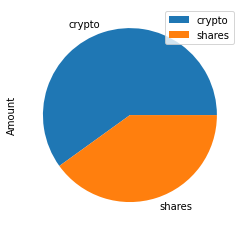

In [230]:
#plot savings pie chart
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
saving_plot = df_savings.plot.pie(subplots=True,y='Amount')

In [250]:
# Set ideal emergency fund
# An ideal emergency fund should be equal to three times your monthly income
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = df_savings.sum().item()

# test shortfall, uncomment out line below to test
# total_savings = 0

# test reaching goal, uncomment out line below to test
# total_savings = 36000

#amount of shortfall to ideal emergecy fund
shortfall = emergency_fund - total_savings 

# TEMP Test print of variables
# print(f"monthly_income: $ {monthly_income}.")
# print(f"emergency_fund: $ {emergency_fund}.")
# print(f"total_savings: $ {total_savings}.")
# print(f"shortfall: $ {shortfall}.")
      
# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations for having enough money in emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations on reaching this financial goal.")
else:
    print(f"You are ${shortfall} away from reaching goal")
       

Congratulations for having enough money in emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [268]:
# Get 5 years' worth of historical data for SPY and AGG

In [269]:
# Set timeframe to "1Day"
timeframe = "1Day"

In [270]:
# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2017-04-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-07", tz="America/New_York").isoformat()

In [271]:
# Set the ticker information
tickers = ["SPY","AGG"]

In [272]:
# Get 5 year's worth of historical price data for tickers
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [273]:
# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-07 04:00:00+00:00,108.80,108.89,108.4200,108.44,1783599,8534,108.645684,AGG
2017-04-10 04:00:00+00:00,108.53,108.65,108.4901,108.58,1903768,12236,108.566615,AGG
2017-04-11 04:00:00+00:00,108.79,108.98,108.7500,108.89,2200830,11420,108.874603,AGG
2017-04-12 04:00:00+00:00,108.93,109.20,108.8900,109.13,2432965,10372,109.013960,AGG
2017-04-13 04:00:00+00:00,109.25,109.39,109.1300,109.27,2339939,13465,109.262713,AGG


In [274]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)


In [275]:
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

In [276]:
# Display sample data
df_stock_data.head()

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2017-04-07 04:00:00+00:00  235.18  236.000  234.64  235.20  74412311   
2017-04-10 04:00:00+00:00  235.36  236.255  234.73  235.34  67615302   
2017-04-11 04:00:00+00:00  234.90  235.180  233.34  235.06  88045276   
2017-04-12 04:00:00+00:00  234.80  234.960  233.77  234.03  81864436   
2017-04-13 04:00:00+00:00  233.65  234.490  232.51  232.51  92880394   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-04-07 04:00:00+00:00      235941  235.290964  108.80  108.89  108.4200   
2017-04-10 04:00:00+00:00      211985  235.487358  108.53  108.65  108.4901   
2017-04-11 04:00:00+00:00      306525  234.499802  108.79  108.98  108.7500   
2017-04-12 04:00:00+00:00      262862  234.298297  108.93  109.20  108.8900   
2017-04-13 04:00:00+00:00      303955  233.364725  109.25  109.39  109.1300   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-04-07 04:00:00+00:00  108.44  1783599        8534  108.645684  
2017-04-10 04:00:00+00:00  108.58  1903768       12236  108.566615  
2017-04-11 04:00:00+00:00  108.89  2200830       11420  108.874603  
2017-04-12 04:00:00+00:00  109.13  2432965       10372  109.013960  
2017-04-13 04:00:00+00:00  109.27  2339939       13465  109.262713

In [277]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [278]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

SPY                                     \
                             open     high     low   close    volume   
timestamp                                                              
2017-04-07 04:00:00+00:00  235.18  236.000  234.64  235.20  74412311   
2017-04-10 04:00:00+00:00  235.36  236.255  234.73  235.34  67615302   
2017-04-11 04:00:00+00:00  234.90  235.180  233.34  235.06  88045276   
2017-04-12 04:00:00+00:00  234.80  234.960  233.77  234.03  81864436   
2017-04-13 04:00:00+00:00  233.65  234.490  232.51  232.51  92880394   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-07 04:00:00+00:00      235941  235.290964          NaN  108.80   
2017-04-10 04:00:00+00:00      211985  235.487358     0.000595  108.53   
2017-04-11 04:00:00+00:00      306525  234.499802    -0.001190  108.79   
2017-04-12 04:00:00+00:00      262862  234.298297    -0.004382  108.93   
2017-04-13 04:00:00+00:00      303955  233.364725    -0.006495  109.25   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2017-04-07 04:00:00+00:00  108.89  108.4200  108.44  1783599        8534   
2017-04-10 04:00:00+00:00  108.65  108.4901  108.58  1903768       12236   
2017-04-11 04:00:00+00:00  108.98  108.7500  108.89  2200830       11420   
2017-04-12 04:00:00+00:00  109.20  108.8900  109.13  2432965       10372   
2017-04-13 04:00:00+00:00  109.39  109.1300  109.27  2339939       13465   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-07 04:00:00+00:00  108.645684          NaN  
2017-04-10 04:00:00+00:00  108.566615     0.001291  
2017-04-11 04:00:00+00:00  108.874603     0.002855  
2017-04-12 04:00:00+00:00  109.013960     0.002204  
2017-04-13 04:00:00+00:00  109.262713     0.001283

In [279]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\miscg\zzz\PersonalFinancePlanner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983950,1.011951,0.999330,0.999615,1.020786,0.992792,1.007505,0.986757,0.989383,0.995601,...,0.999232,1.007074,1.005549,0.999860,1.000727,0.988307,0.996291,0.993199,1.005519,1.018214
2,0.997660,1.018620,1.008885,1.005870,1.018685,0.982871,1.010579,0.981943,0.979213,1.002442,...,0.998637,1.007828,0.999037,1.001648,0.997423,0.996363,1.014381,0.995952,0.999538,1.021206
3,1.001254,1.009729,1.012081,1.016862,1.019145,0.980986,1.008602,0.973559,0.984842,1.004025,...,1.014452,1.004578,0.993888,0.997619,1.001280,1.005359,1.002858,1.017075,1.001484,1.024878
4,1.001439,1.001925,1.017018,1.023489,1.022321,0.983264,1.013996,0.964853,0.980619,0.999063,...,1.014341,1.009065,0.973767,1.001740,1.004921,1.008697,1.010077,1.008011,1.013217,1.033087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.122364,1.835010,2.079747,1.683487,1.521721,1.463309,1.397185,1.725532,0.961511,1.370425,...,2.410288,1.074972,1.751038,0.730256,1.298773,1.663147,1.461494,1.097239,0.963643,2.693983
1257,1.117423,1.862672,2.069234,1.702335,1.497766,1.461262,1.397399,1.729990,0.951965,1.401276,...,2.421241,1.067753,1.729722,0.725279,1.297161,1.674496,1.461450,1.087219,0.956049,2.690249
1258,1.100495,1.862462,2.073822,1.702987,1.495578,1.461045,1.403562,1.720044,0.952586,1.410358,...,2.424561,1.056230,1.730804,0.724215,1.306391,1.689410,1.476154,1.094826,0.955414,2.652819
1259,1.098522,1.861312,2.067370,1.706568,1.484045,1.441112,1.406713,1.682615,0.953886,1.401187,...,2.438125,1.058224,1.714377,0.725966,1.304958,1.683542,1.482633,1.096341,0.940197,2.662528


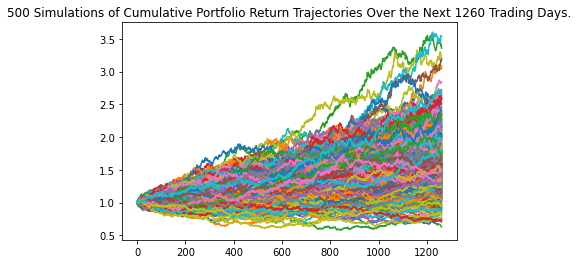

In [280]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

In [281]:
# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

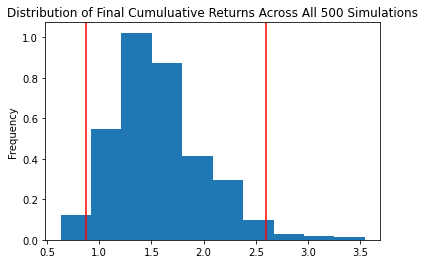

In [283]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [284]:
# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [285]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

In [286]:
# Print summary statistics
print(tbl)

count           500.000000
mean              1.570379
std               0.444620
min               0.629600
25%               1.269222
50%               1.505375
75%               1.800245
max               3.542575
95% CI Lower      0.870157
95% CI Upper      2.593233
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [287]:
# Set initial investment
initial_investment = 20000

In [290]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments in stocks
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

In [291]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17403.14 and $51864.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


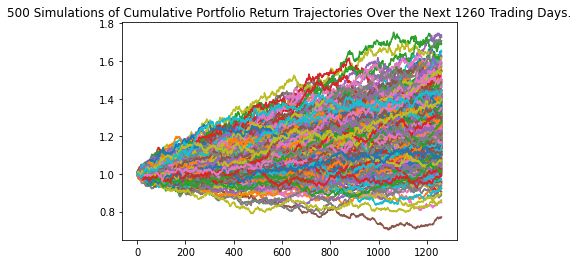

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

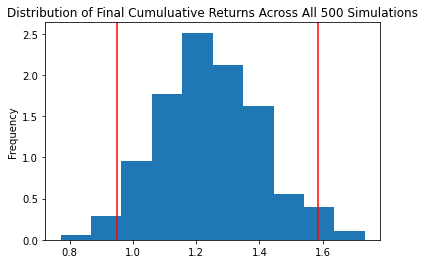

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


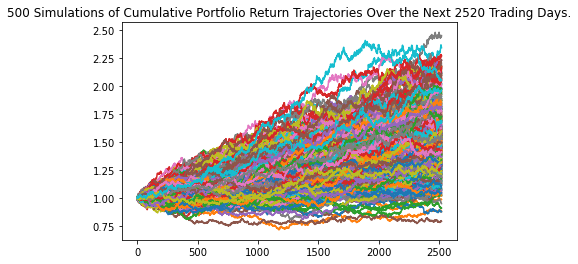

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

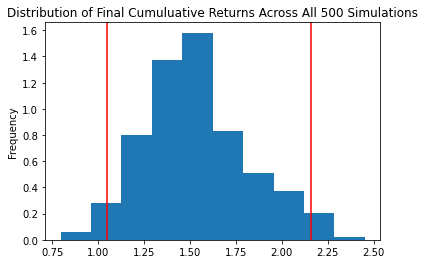

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
